# Image Compression

In [122]:
import numpy as np
import cv2
import os
import pandas as pd
import matplotlib.image as image
from matplotlib import pyplot as plt
from scipy.fftpack import fft, dct
import math


####TASK 1 --- Divide into 8 by 8 blocks, which is what jpeg used.

The Shape of the image is: 400 800


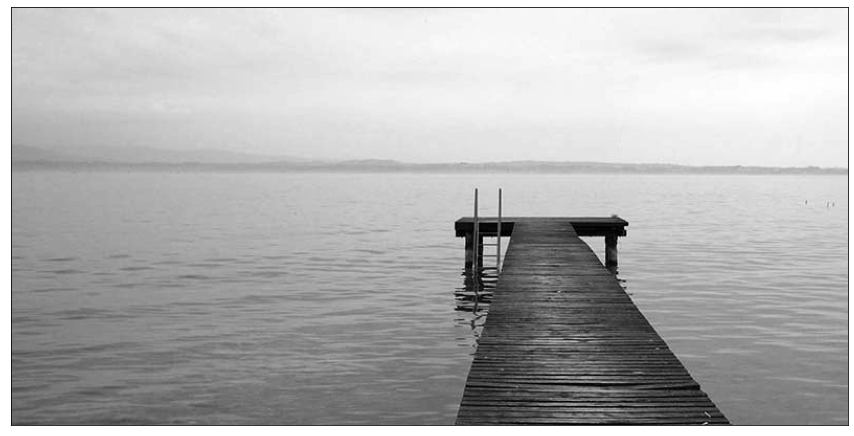

In [123]:
# convert image into n*n into non-overlapping 8by8 block
N = 8 

# # Using cv2.imread() method
img = cv2.imread('Images\jpeg-home.jpg',0)

# height width and channel
height, width = img.shape[:2]

#know about the image
print('The Shape of the image is:',height, width)

# # Displaying the image
plt.figure(figsize=(15,15))
plt.imshow(img,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

plt.imsave('gray.jpg', img, cmap='gray')

In [124]:
# Quantization Matrix (Jpeg Standard) Source: Cogranne, R. (2018). Determining JPEG image standard quality factor from the quantization tables. arXiv preprint arXiv:1802.00992.
# 50% compression
A = np.array([[16,11,10,16,24,40,51,61],
[12,12,14,19,26,58,60,55],
[14,13,16,24,40,57,69,56],
[14,17,22,29,51,87,80,62],
[18,22,37,56,68,109,103,77],
[24,35,55,64,81,104,113,92],
[49,64,78,87,103,121,120,101],
[72,92,95,98,112,100,103,99]])



In [125]:
# inital values
name = 'File'
frmt = 'jpeg'
block_list = []

In [126]:
preloc = np.zeros((8,8))

# divide the image into blocks
for i in range(0,height,N):
    # row
    k = i+N
    for i2 in range(0,width,N):
        #column
        k2 = i2+N
        # fix size of the image
        This = img[i:k,i2:k2]
        x,y = This.shape
        # non-overlapping edge fix
        preloc[:x,:y] = This
        block_list.append(preloc-np.ones((8,8))*128)
    
print("Number of 8by8 blocks: "+str(len(block_list)))
print("Block size ", block_list[-1].shape)


Number of 8by8 blocks: 5000
Block size  (8, 8)


In [127]:
#perform DCT and Fourier Transform of each block
DCT_result = []
for each in block_list:
    DCT = cv2.dct(each)
    DCT_result.append(DCT)
DCT_result[0][0]


array([ 1.70000000e+02, -7.29856570e+00,  8.15640312e+00, -1.58878820e+00,
        0.00000000e+00,  1.41095436e-01, -1.21370839e+00, -4.32183823e-01])

In [128]:
# quantization function
print('what quantization method to choose 1. standard matrix 2. round by N:   3. preserve Nth largest value (not recommended)')
sct = input("")
ok = 0
match sct:
    case "1":
        for ndct in DCT_result:
            for i in range(N):
                for j in range(N):
                    ndct[i,j] = np.around(ndct[i,j]/A[i,j])
    case "2":
        for ndct in DCT_result:
            for i in range(N):
                for j in range(N):
                    ndct[i,j] = math.floor(ndct[i,j]/N)*N
    case "3":
        for ndct in DCT_result:
            aa=DCT_result[ok].reshape((1,N*N))
            # deceding order
            sorted = -np.sort(-aa)
            # largest 8 values
            first_8 = sorted[:,8:]
            # convert (R, 1) to (R,)
            save2value = np.ravel( first_8.transpose()[ : , 0] )  
            ok = ok+1
            for i in range(N):
                for j in range(N):
                    ndct[i,j] = np.around(save2value[j])
DCT_result[0][0].shape

what quantization method to choose 1. standard matrix 2. round by N:   3. preserve Nth largest value


(8,)

In [129]:
# inverse transform DCT
invList = []
for each_t in DCT_result:
    inv_DCT = cv2.idct(each_t)
    invList.append(inv_DCT)
invList[0][0]

array([1.36494039, 1.29566506, 1.20913862, 1.17719221, 1.24616705,
       1.40556236, 1.58963396, 1.71170035])

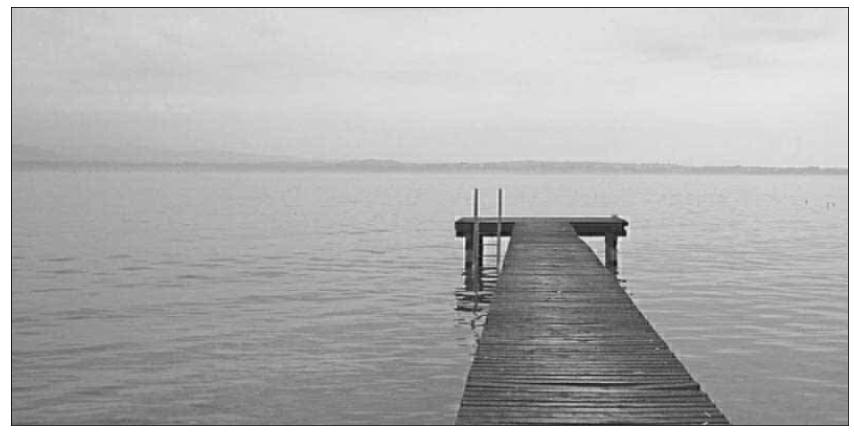

In [130]:
row = 0
rowNcol = []
for j in range(int(width/N),len(invList)+1,int(width/N)):
    rowNcol.append(np.hstack((invList[row:j])))
    row = j
reduced = np.vstack((rowNcol))


plt.figure(figsize=(15,15))
plt.imshow(reduced,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.show()

plt.imsave('compressed_L.jpg', reduced, cmap='gray')